In [2]:
import pandas as pd
import os
from enum import Enum
from typing import List

class MovieDataLoader:
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.extension = os.path.splitext(file_path)[1]
        self.dataframe = None

    def load(self) -> pd.DataFrame:
        self.dataframe = pd.read_csv(
            self.file_path,
            sep='\t' if self.extension == '.txt' else ','
        )
        return self.dataframe

class DB(Enum):
    CASTINGS = 0
    COUNTRIES = 1
    GENRES = 2
    RATES = 3
    MOVIES = 4
    PEOPLES = 5

def get_dataframes() -> List[pd.DataFrame]:
    base_path = os.path.join(
        os.getcwd(),
        "data/kmrd/kmr_dataset/datafile/kmrd-small"
    )
    db_name = ["castings.csv", "countries.csv", "genres.csv", "rates.csv", "movies.txt", "peoples.txt"]
    db_paths = [os.path.join(base_path, name) for name in db_name]
    return [MovieDataLoader(path).load() for path in db_paths]

In [3]:
dataframes = get_dataframes()
castings_df = dataframes[DB.CASTINGS.value]
countries_df = dataframes[DB.COUNTRIES.value]
genres_df = dataframes[DB.GENRES.value]
rates_df = dataframes[DB.RATES.value]
movies_df = dataframes[DB.MOVIES.value]
peoples_df = dataframes[DB.PEOPLES.value]

print(castings_df.head())
print(countries_df.head())
print(genres_df.head())

   movie  people  order  leading
0  10001    4374      1        1
1  10001     178      2        1
2  10001    3241      3        1
3  10001   47952      4        1
4  10001   47953      5        0
   movie country
0  10001    이탈리아
1  10001     프랑스
2  10002      미국
3  10003      미국
4  10004      미국
   movie   genre
0  10001     드라마
1  10001  멜로/로맨스
2  10002      SF
3  10002     코미디
4  10003      SF


In [4]:
print(rates_df.head())
print(movies_df.head())
print(peoples_df.head())

   user  movie  rate        time
0     0  10003     7  1494128040
1     0  10004     7  1467529800
2     0  10018     9  1513344120
3     0  10021     9  1424497980
4     0  10022     7  1427627340
   movie                 title                           title_eng    year  \
0  10001                시네마 천국              Cinema Paradiso , 1988  2013.0   
1  10002              빽 투 더 퓨쳐           Back To The Future , 1985  2015.0   
2  10003            빽 투 더 퓨쳐 2    Back To The Future Part 2 , 1989  2015.0   
3  10004            빽 투 더 퓨쳐 3  Back To The Future Part III , 1990  1990.0   
4  10005  스타워즈 에피소드 4 - 새로운 희망                    Star Wars , 1977  1997.0   

     grade  
0   전체 관람가  
1  12세 관람가  
2  12세 관람가  
3   전체 관람가  
4       PG  
   people    korean        original
0       5    아담 볼드윈    Adam Baldwin
1       8   애드리안 라인     Adrian Lyne
2       9     에이단 퀸     Aidan Quinn
3      13  구로사와 아키라  Akira Kurosawa
4      15     알 파치노       Al Pacino


In [5]:
from datetime import datetime

# 결측치 확인
def print_missing_values():
    print("결측치 확인:")
    print(movies_df.isnull().sum())
    print(castings_df.isnull().sum())
    print(countries_df.isnull().sum())
    print(genres_df.isnull().sum())
    print(rates_df.isnull().sum())

def remove_missing_values():
    global movies_df, peoples_df
    movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')
    year_median = movies_df['year'].median() if not movies_df['year'].isna().all() else 0

    # Fill missing values
    movies_df.fillna({
        'title': 'Unknown',
        'title_eng': 'Unknown',
        'year': year_median,
        'grade': "Unknown",
    }, inplace=True)

    peoples_df.fillna({
        'original': 'Unknown'
    }, inplace=True)

def remove_outliers():
    global castings_df, countries_df, genres_df, rates_df, movies_df
    current_year = datetime.now().year

    castings_df = castings_df[
        (castings_df["leading"] == 0)
        | (castings_df["leading"] == 1)
    ]
    countries_df = countries_df[
        (10000 < countries_df["movie"])
        & (countries_df["movie"] < 11000)
    ]
    genres_df = genres_df[
        (10000 < genres_df["movie"])
        & (genres_df["movie"] < 11000)
    ]
    rates_df = rates_df[
        (0 < rates_df["rate"])
        & (rates_df["rate"] <= 10)
        & (10000 < rates_df["movie"])
        & (rates_df["movie"] < 11000)
    ]
    movies_df = movies_df[
        (movies_df["year"] >= 1895)
        & (movies_df["year"] < current_year)
        & (10000 < movies_df["movie"])
        & (movies_df["movie"] < 11000)
    ]

print_missing_values()

결측치 확인:
movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [6]:
remove_missing_values()
remove_outliers()
print_missing_values()

결측치 확인:
movie        0
title        0
title_eng    0
year         0
grade        0
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# D2Coding 폰트 경로 설정
font_path = "../D2Coding.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc("font", family=fontprop.get_name())
plt.rcParams.update({"font.size": 14})  # Set the font size to 14
plt.figure(figsize=(16, 9))


<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

user
0        85
1         1
2        15
3        92
4        71
         ..
52023     1
52024     1
52025     1
52026     1
52027     1
Name: movie, Length: 52028, dtype: int64
        user  movie
0          0     85
1          1      1
2          2     15
3          3     92
4          4     71
...      ...    ...
52023  52023      1
52024  52024      1
52025  52025      1
52026  52026      1
52027  52027      1

[52028 rows x 2 columns]


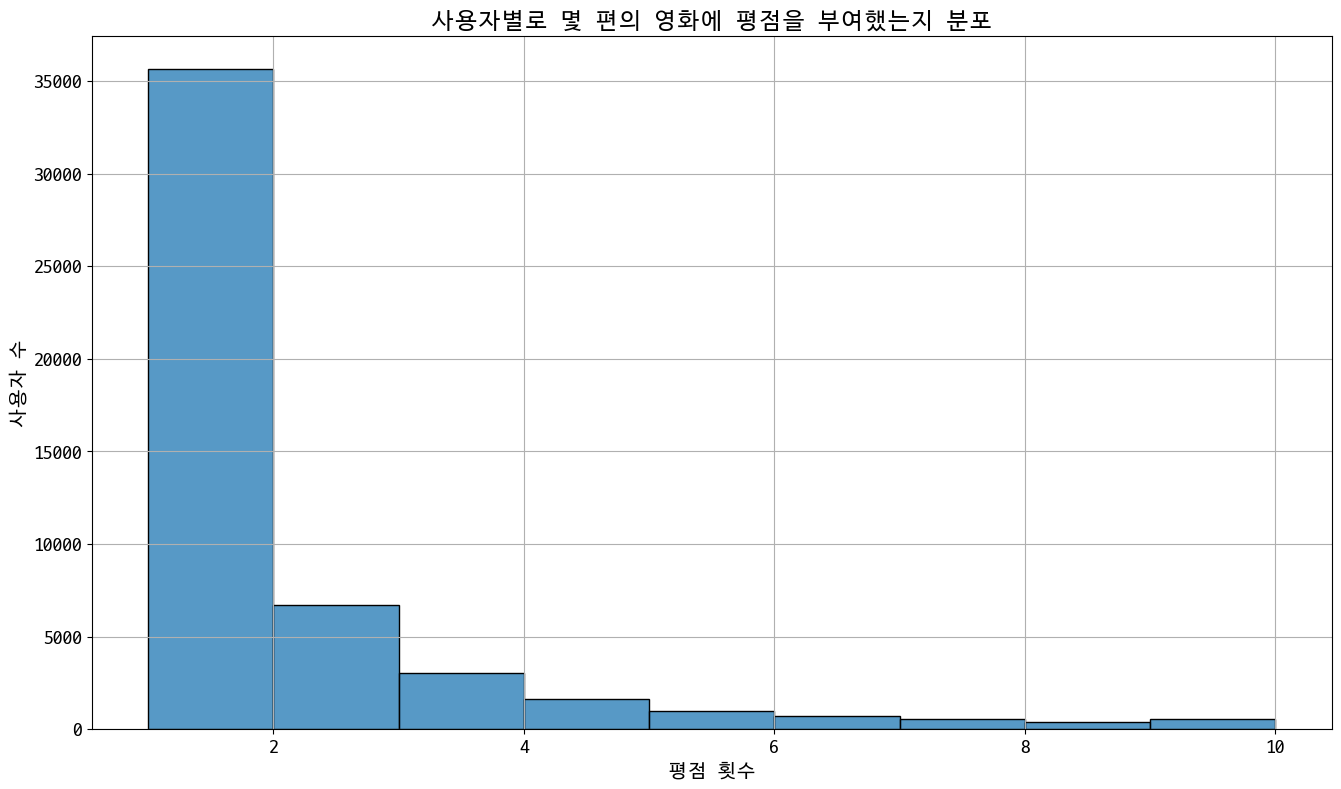

In [31]:
# 사용자별로 몇 편의 영화에 평점을 부여했는지 분포를 확인

# rates_df의 user 컬럼을 기준으로 groupby를 수행하고, movie 컬럼을 기준으로 count를 수행합니다.
user_rates = rates_df.groupby('user')['movie'].count()
print(user_rates)
user_rates = user_rates.reset_index()
print(user_rates)
user_rates.columns = ['user', 'rate_count']

# 히스토그램을 그립니다.
plt.figure(figsize=(16, 9))
sns.histplot(data=user_rates, x='rate_count', bins=range(1, 11), kde=False)
plt.title("사용자별로 몇 편의 영화에 평점을 부여했는지 분포")
plt.xlabel("평점 횟수")
plt.ylabel("사용자 수")
plt.grid()
plt.show()


    user  movie  rate                time
48     0  10330    10 2014-01-05 09:58:00
13     0  10048     7 2014-03-06 14:06:00
64     0  10546    10 2014-03-09 08:37:00
33     0  10132     9 2014-06-21 04:36:00
38     0  10201     8 2014-09-20 08:58:00
..   ...    ...   ...                 ...
60     0  10494     6 2017-09-05 12:11:00
67     0  10592     6 2017-09-21 08:34:00
2      0  10018     9 2017-12-15 13:22:00
9      0  10029     9 2017-12-18 13:12:00
78     0  10874     7 2018-01-06 11:47:00

[85 rows x 4 columns]


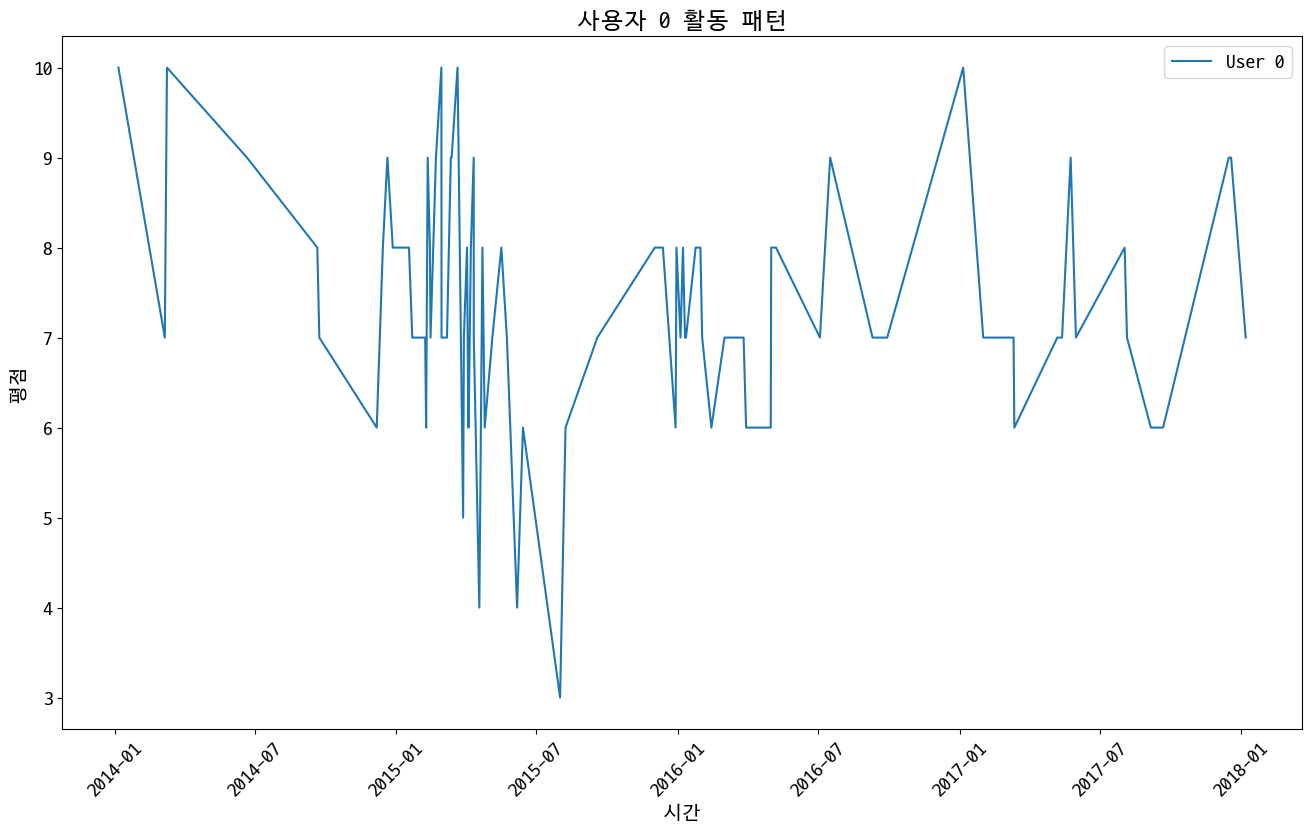

In [35]:
# 특정 사용자 활동 패턴 (예: 사용자 ID가 0인 경우)
user_id = 0
rates_df['time'] = pd.to_datetime(rates_df['time'], unit='s')
# print(rates_df['time'])
user_data = rates_df[rates_df['user'] == user_id].sort_values(by='time')
print(user_data)

plt.figure(figsize=(16, 9))
plt.plot(user_data['time'], user_data['rate'], label=f'User {user_id}')
plt.xlabel('시간')
plt.ylabel('평점')
plt.title(f'사용자 {user_id} 활동 패턴')
plt.legend()
plt.xticks(rotation=45)  # x값의 표시 횟수를 늘리기 위해 회전
plt.show()

user  genre
0     SF       11
      가족        3
      공포        4
      느와르       2
      드라마      60
               ..
20    애니메이션     2
      액션       21
      전쟁       17
      코미디      23
      판타지      14
Length: 194, dtype: int64
genre        SF        가족        공포       느와르       드라마    멜로/로맨스        모험  \
user                                                                          
0      2.484907  1.386294  1.609438  1.098612  4.110874  2.995732  1.386294   
1      0.000000  0.000000  0.000000  0.000000  0.693147  0.000000  0.000000   
2      1.609438  0.000000  1.791759  0.000000  2.079442  1.386294  1.098612   
3      2.484907  0.693147  1.945910  0.000000  4.043051  3.091042  3.218876   
4      2.079442  1.098612  2.708050  1.609438  3.784190  2.564949  1.791759   
5      0.000000  0.000000  0.000000  0.000000  0.693147  0.000000  0.000000   
6      0.693147  0.693147  0.693147  0.000000  1.609438  0.693147  0.693147   
7      0.693147  0.000000  0.000000  0.000000  1.0986

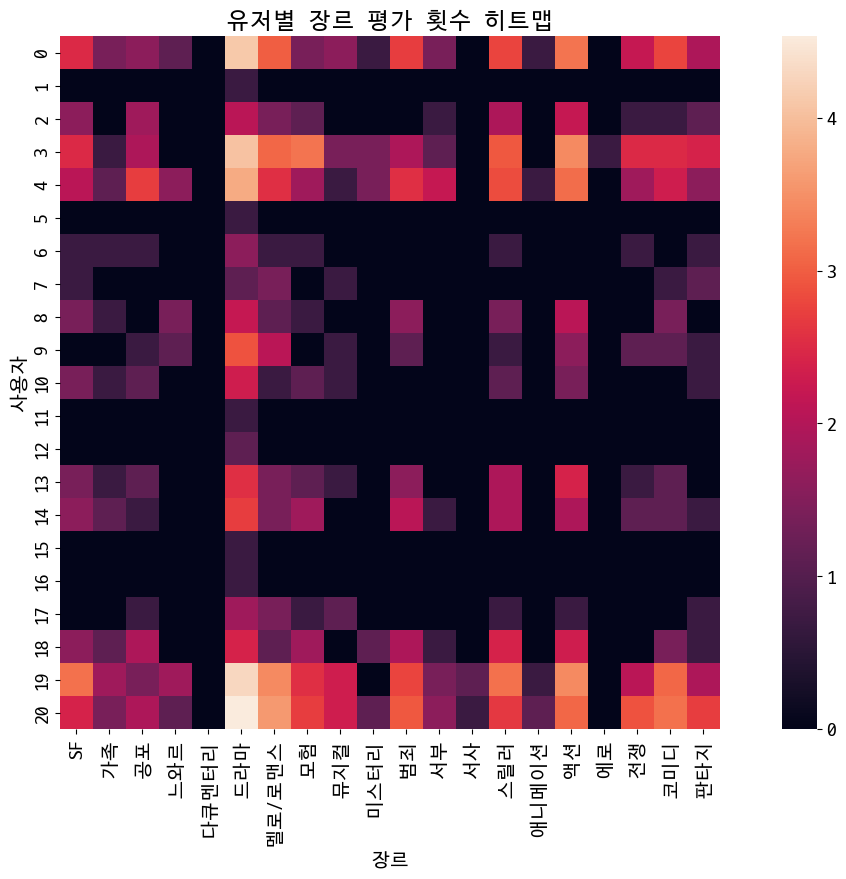

In [39]:
import numpy as np

# 유저 ID가 0부터 20까지의 데이터만 필터링
filtered_rates_df = rates_df[(0 <= rates_df['user']) & (rates_df['user'] <= 20)]

# rates_df와 genres_df 병합
merged_df = pd.merge(filtered_rates_df, genres_df, on='movie')
# print(merged_df.head())

# 유저별 장르 평가 횟수 히트맵
user_genre_counts = merged_df.groupby(['user', 'genre']).size()
print(user_genre_counts)
user_genre_counts = user_genre_counts.unstack().fillna(0).map(lambda x: np.log1p(x))
print(user_genre_counts)

# 모든 장르 확인
all_genres = genres_df['genre'].unique()

# 없는 장르에 대해 0 추가
for genre in all_genres:
    if genre not in user_genre_counts.columns:
        user_genre_counts[genre] = 0

user_genre_counts = user_genre_counts[sorted(user_genre_counts.columns)]

# 히트맵
plt.figure(figsize=(16, 9))
sns.heatmap(user_genre_counts, square=True)
plt.xlabel('장르')
plt.ylabel('사용자')
plt.title('유저별 장르 평가 횟수 히트맵')
plt.show()